In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m_cil = 1618.89 / 1000     # кг
d_cil = 78.2 / 10          # cм
g = 9.8 * 100              # см/с**2
l = 121 / 10               # cм -- до крайней риски
r_cil = d_cil / 2


In [3]:
T_cil_arr = np.array([96.81, 97.15, 97.28, 96.37, 97.25, 96.50])
T_rot_arr = np.array([76.71, 76.81, 76.72, 77.06, 77.46, 76.78, 76.69, 76.94, 76.97, 77.03, 77.09])

T_cil = T_cil_arr.mean() / 10
T_rot = T_rot_arr.mean() / 10

I_cil = m_cil * d_cil ** 2 / 8
I_rot = I_cil * (T_rot ** 2 / T_cil ** 2)

print("Момент инерции цилиндра: ", I_cil)
print("Момент инерции ротора: ", I_rot)

k = l * g / (2 * np.pi * I_rot)

print("Коэффициент установки: ", k)

Момент инерции цилиндра:  12.374876104500002
Момент инерции ротора:  7.80144988318
Коэффициент установки:  241.911355382


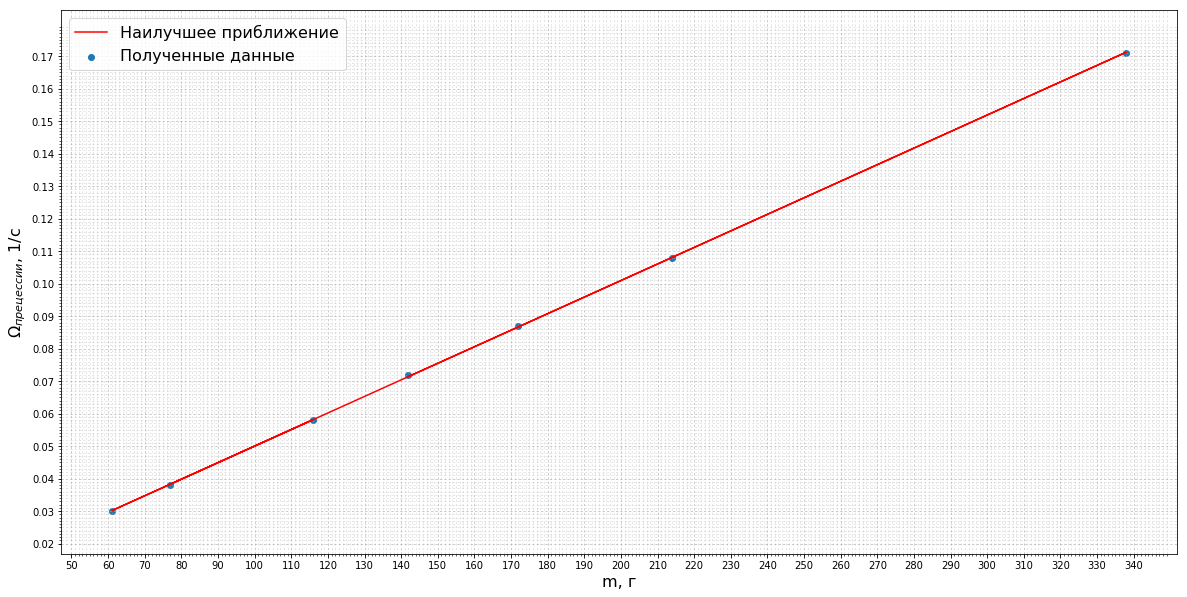

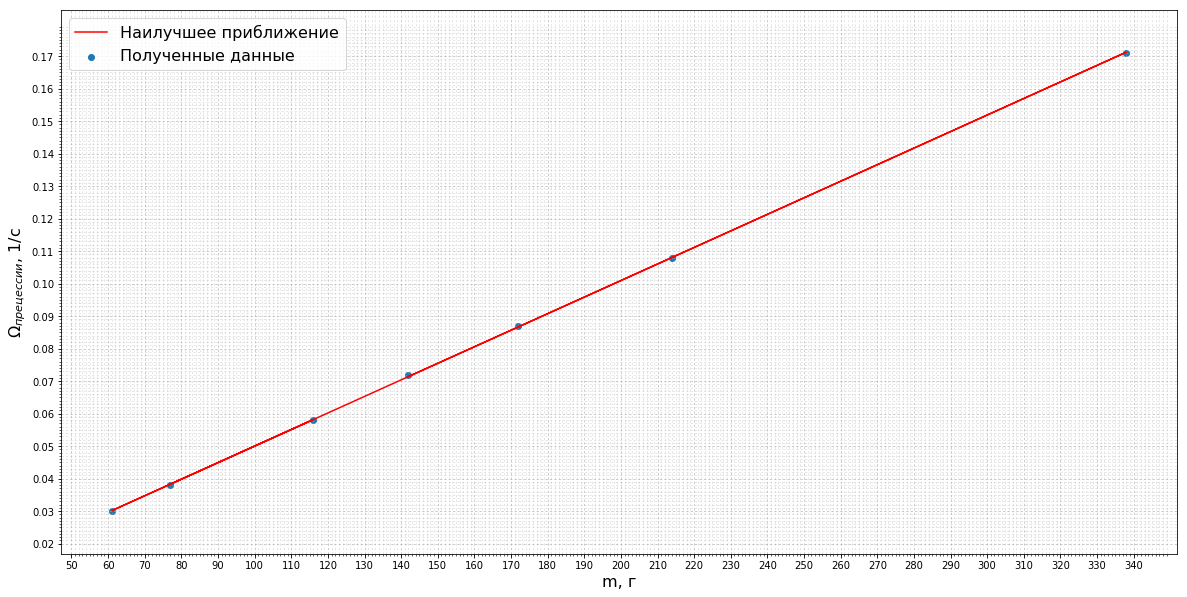

In [5]:
def w0(m, T_pr):
    return k * m * T_pr

m = np.array([142,
              172,
              214,
              338,
              61, 
              116,
              77])  # г

t = np.array([[14.57, 14.28, 14.38, 14.53, 14.41, 14,46],
              [12.25, 12.00, 11.90, 11.94, 12.00, 11.85],
              [9.72, 9.75, 9.62, 9.60, 9.71, 9.72],
              [6.31, 5.94, 6.13, 5.99, 6.00, 6.16],
              [35.10, 34.53, 35.00, 34.87, 34.63, 34.47],
              [17.78, 17.78, 18.16, 18.06, 17.44, 18.12],
               [26.84, 26.72, 26.97, 27.06, 26.85, 26.95]])

OMEGA_prec = np.array([7.2,
                       8.7,
                       10.8,
                       17.1,
                       3.0,
                       5.8,
                       3.8]) / 100 # 1 / c


grid = np.linspace(m.min(), m.max(), 1000)
k, b = np.polyfit(m, OMEGA_prec, 1)

ax = plt.figure(figsize=(20, 10)).add_subplot(1, 1, 1)

ax.scatter(m, OMEGA_prec, label="Полученные данные")
ax.plot(m, k * m + b, label="Наилучшее приближение", color="red")

minor_xticks = np.arange(50, 350, 1)
major_xticks = np.arange(50, 350, 10)
minor_yticks = np.arange(0.02, 0.18, 0.001)
major_yticks = np.arange(0.02, 0.18, 0.01)

ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor=True)
ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor=True)

ax.grid(which='minor', alpha=0.4, ls=':')
ax.grid(which='major', alpha=0.6, ls=':')

plt.xlabel("m, г", fontsize=16)
plt.ylabel("$\Omega_{прецессии}$, 1/c", fontsize=16)
plt.legend(loc='best', fontsize=16)

plt.savefig('precess.png')
plt.show()